In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jonas\AppData\Local\Temp\ipykernel_29548\1140549349.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\_collectio

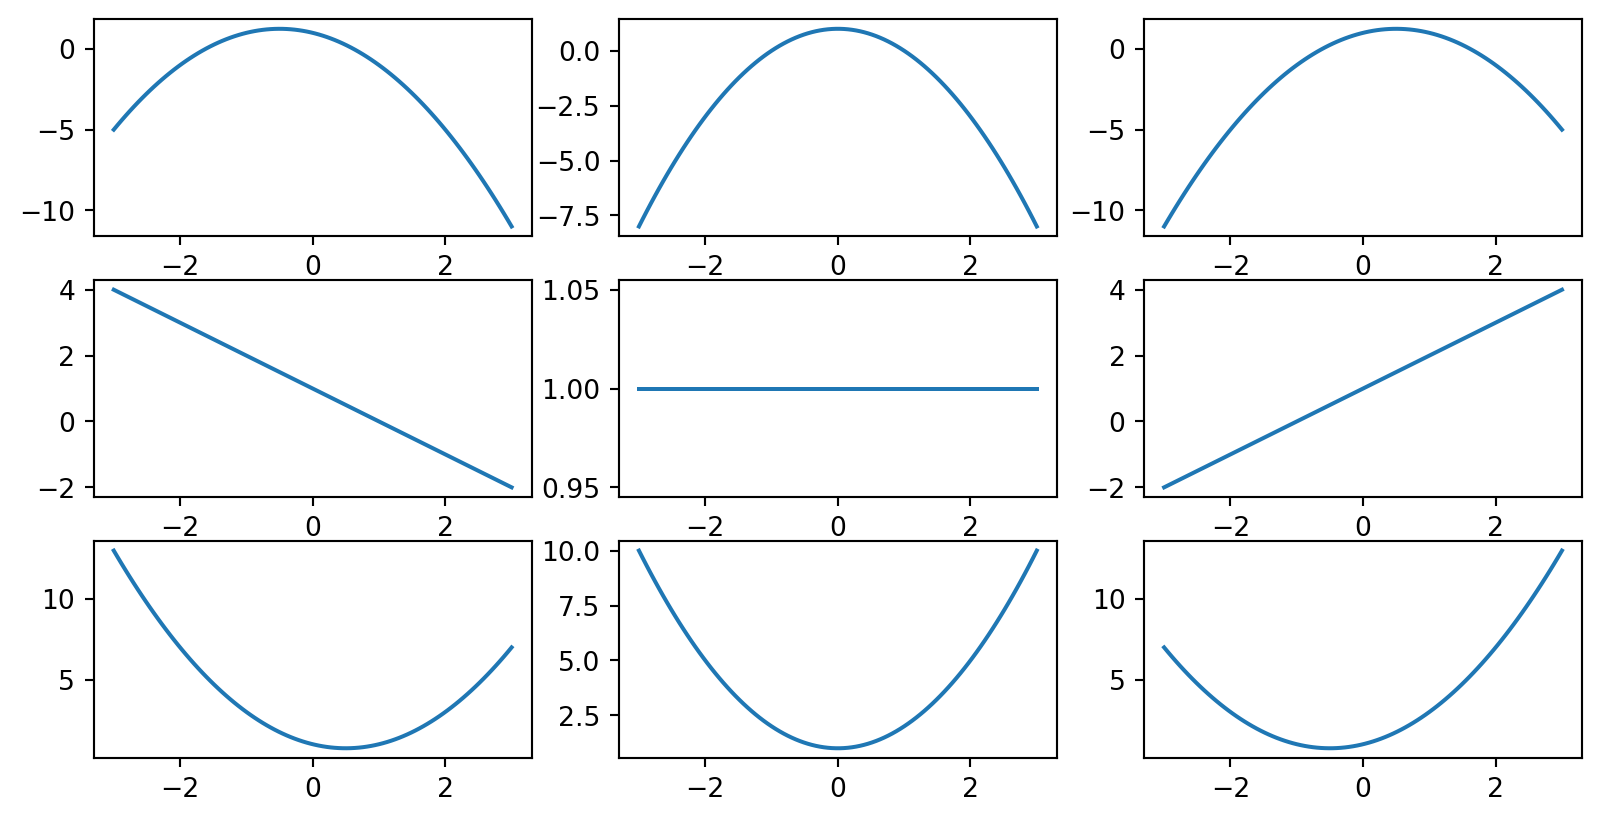

In [2]:
#| echo: false

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product # We'll see how this works below.
params = np.array(list(product([-1, 0 ,1], [-1,0,1])))
x = np.linspace(-3, 3, 100)
c = 1
f = lambda x, a, b, c: c + b * x + a * x ** 2
# Let's plot it now.
fig, axs = plt.subplots(3, 3)
for (a, b), (i, j) in zip(params, product(range(3), range(3))):
  axs[i, j].plot(x, f(x, a, b, c))

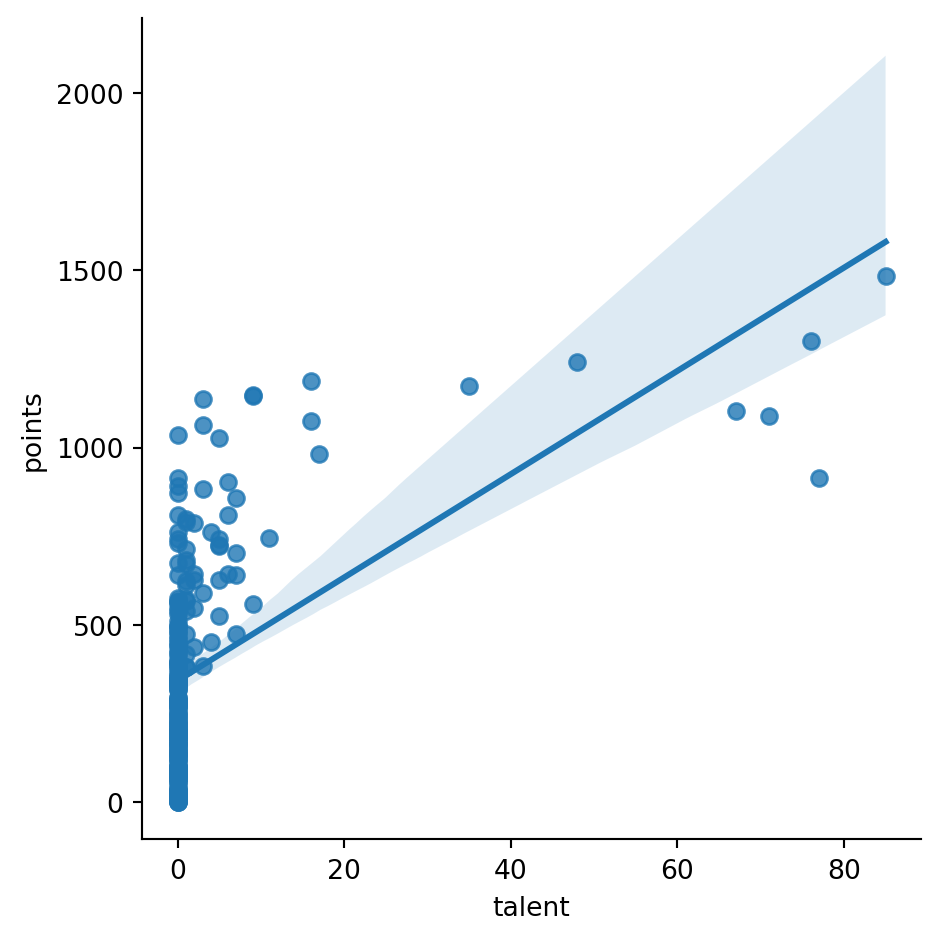

In [3]:
url = "https://gist.githubusercontent.com/JonasMoss/ae5436bf951da5b3e723ce6fec39e77f/raw/03148a170130686d95f020b81e27bc14b35705ff/talent.csv"
talent = pd.read_csv(url)
sns.lmplot(x = "talent", y = "points", data = talent)

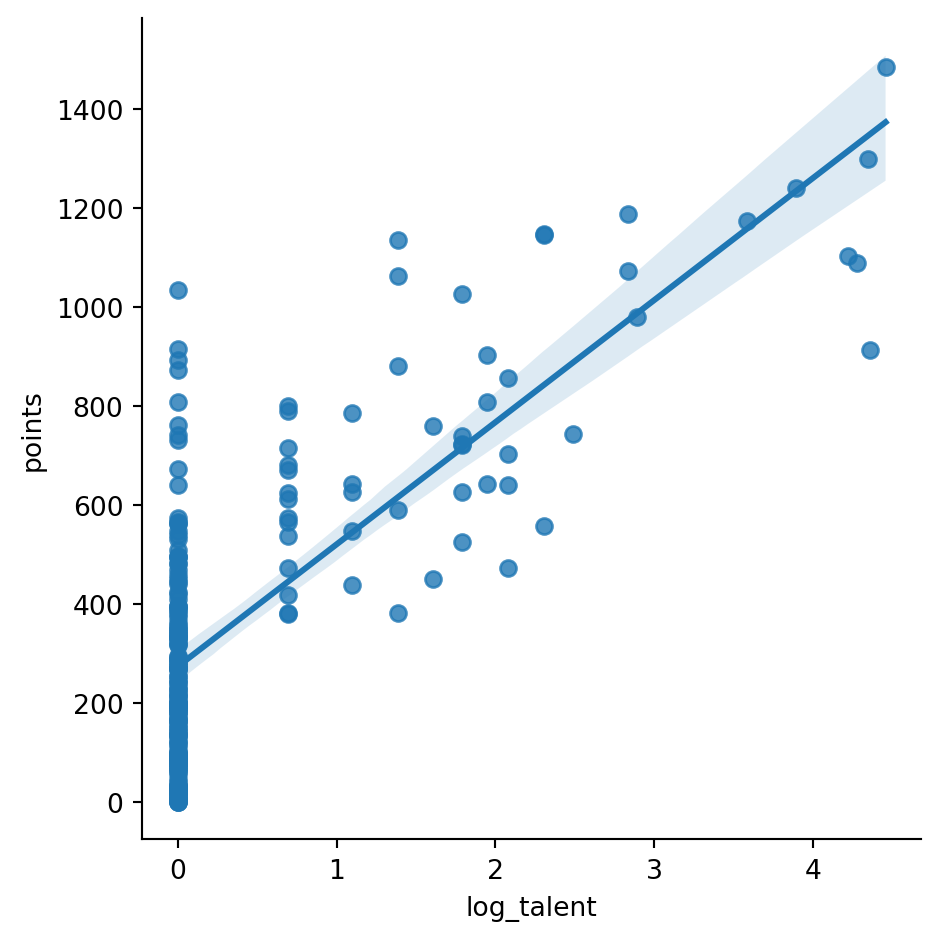

In [4]:
talent["log_talent"] = np.log(talent["talent"] + 1)
sns.lmplot(x = "log_talent", y = "points", data = talent)

In [5]:
import statsmodels.formula.api as smf
fit = smf.ols(formula = 'points ~ np.log(talent + 1)', data=talent).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     268.8
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.30e-39
Time:                        07:38:41   Log-Likelihood:                -1408.4
No. Observations:                 208   AIC:                             2821.
Df Residuals:                     206   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            273.8867     16

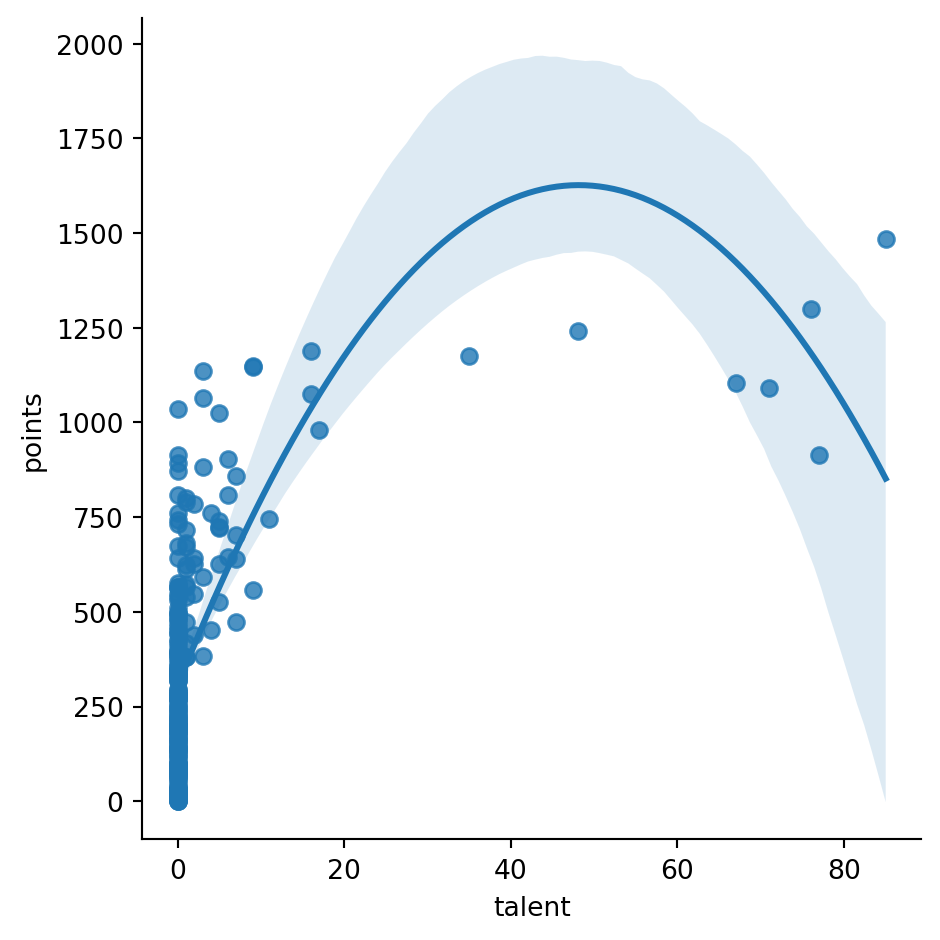

In [6]:
#| echo: false
sns.lmplot(x = "talent", y = "points", data = talent, order = 2)

In [7]:
fit = smf.ols(formula = 'points ~ talent + I(talent ** 2)', data=talent).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     88.87
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.61e-28
Time:                        07:38:41   Log-Likelihood:                -1430.3
No. Observations:                 208   AIC:                             2867.
Df Residuals:                     205   BIC:                             2877.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        305.3440     17.627     17.

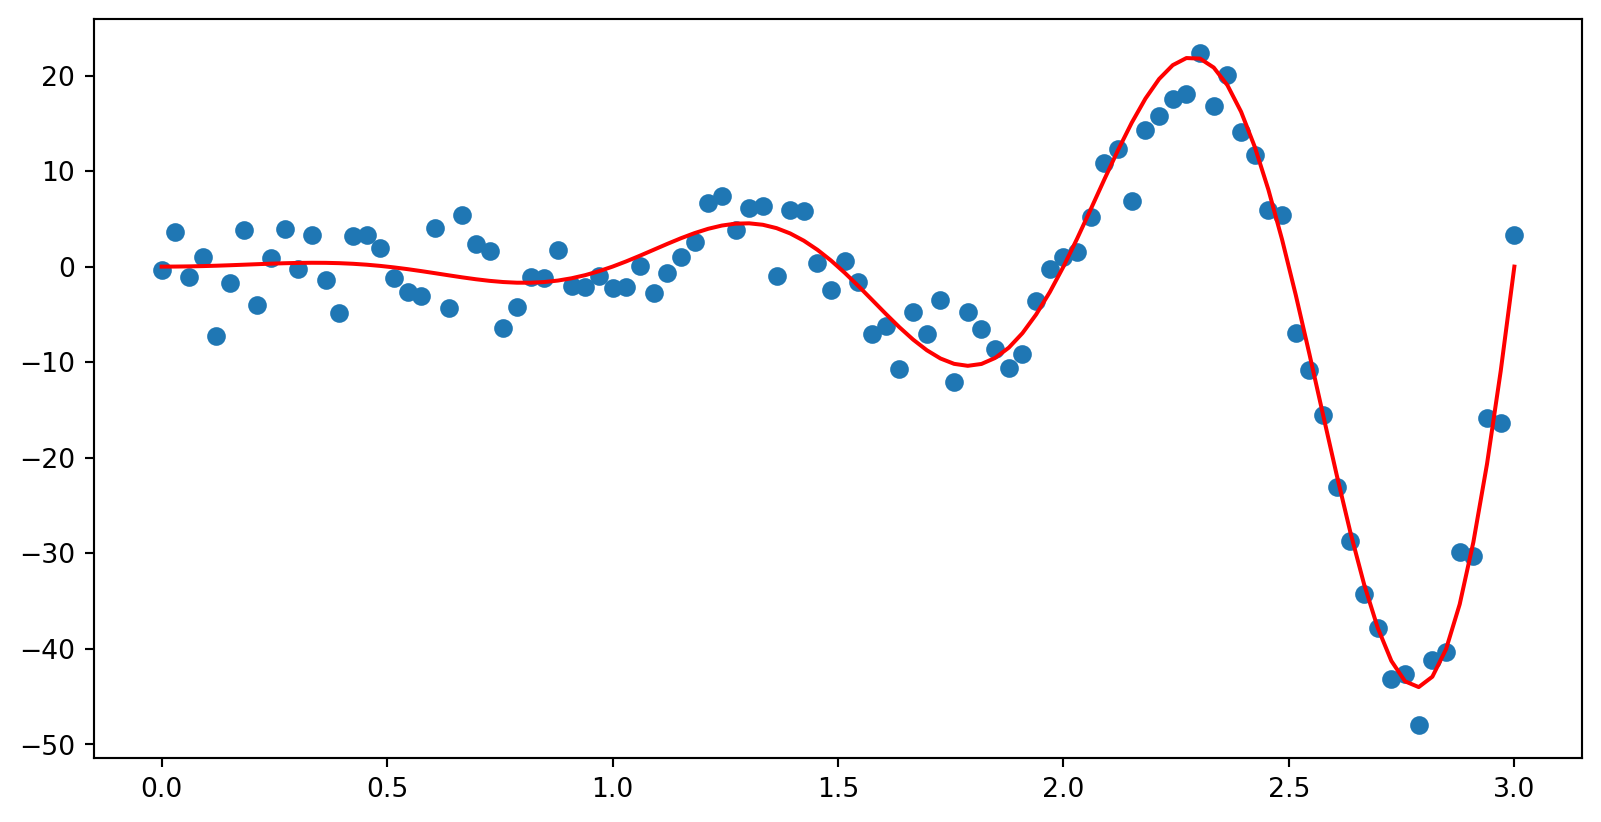

In [8]:
#| echo: false
#| fig-align: center
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed = 313)
x = np.linspace(0, 3, 100)
trues = np.sin(2 * np.pi * x) * x * np.exp(x)
y = trues + rng.normal(0, 3, 100)
plt.plot(x,trues, color = "red")
plt.scatter(x, y)
plt.show()

In [9]:
def fit_model(deg):
  formula = "y ~ np.vander(x, " + str(deg) + ", increasing = True)-1"
  return smf.ols(formula, data = pd.DataFrame({"x" :x, "y":y})).fit()

In [10]:
[(deg, fit_model(deg).aic) for deg in range(5, 16)]

[(5, 770.3176318449504),
 (6, 765.6739087918303),
 (7, 722.3531744500278),
 (8, 631.4232378065403),
 (9, 611.365210202308),
 (10, 570.3460457476948),
 (11, 516.8364848836604),
 (12, 518.5146827024718),
 (13, 516.993964244756),
 (14, 518.9040946323105),
 (15, 520.2862547758479)]

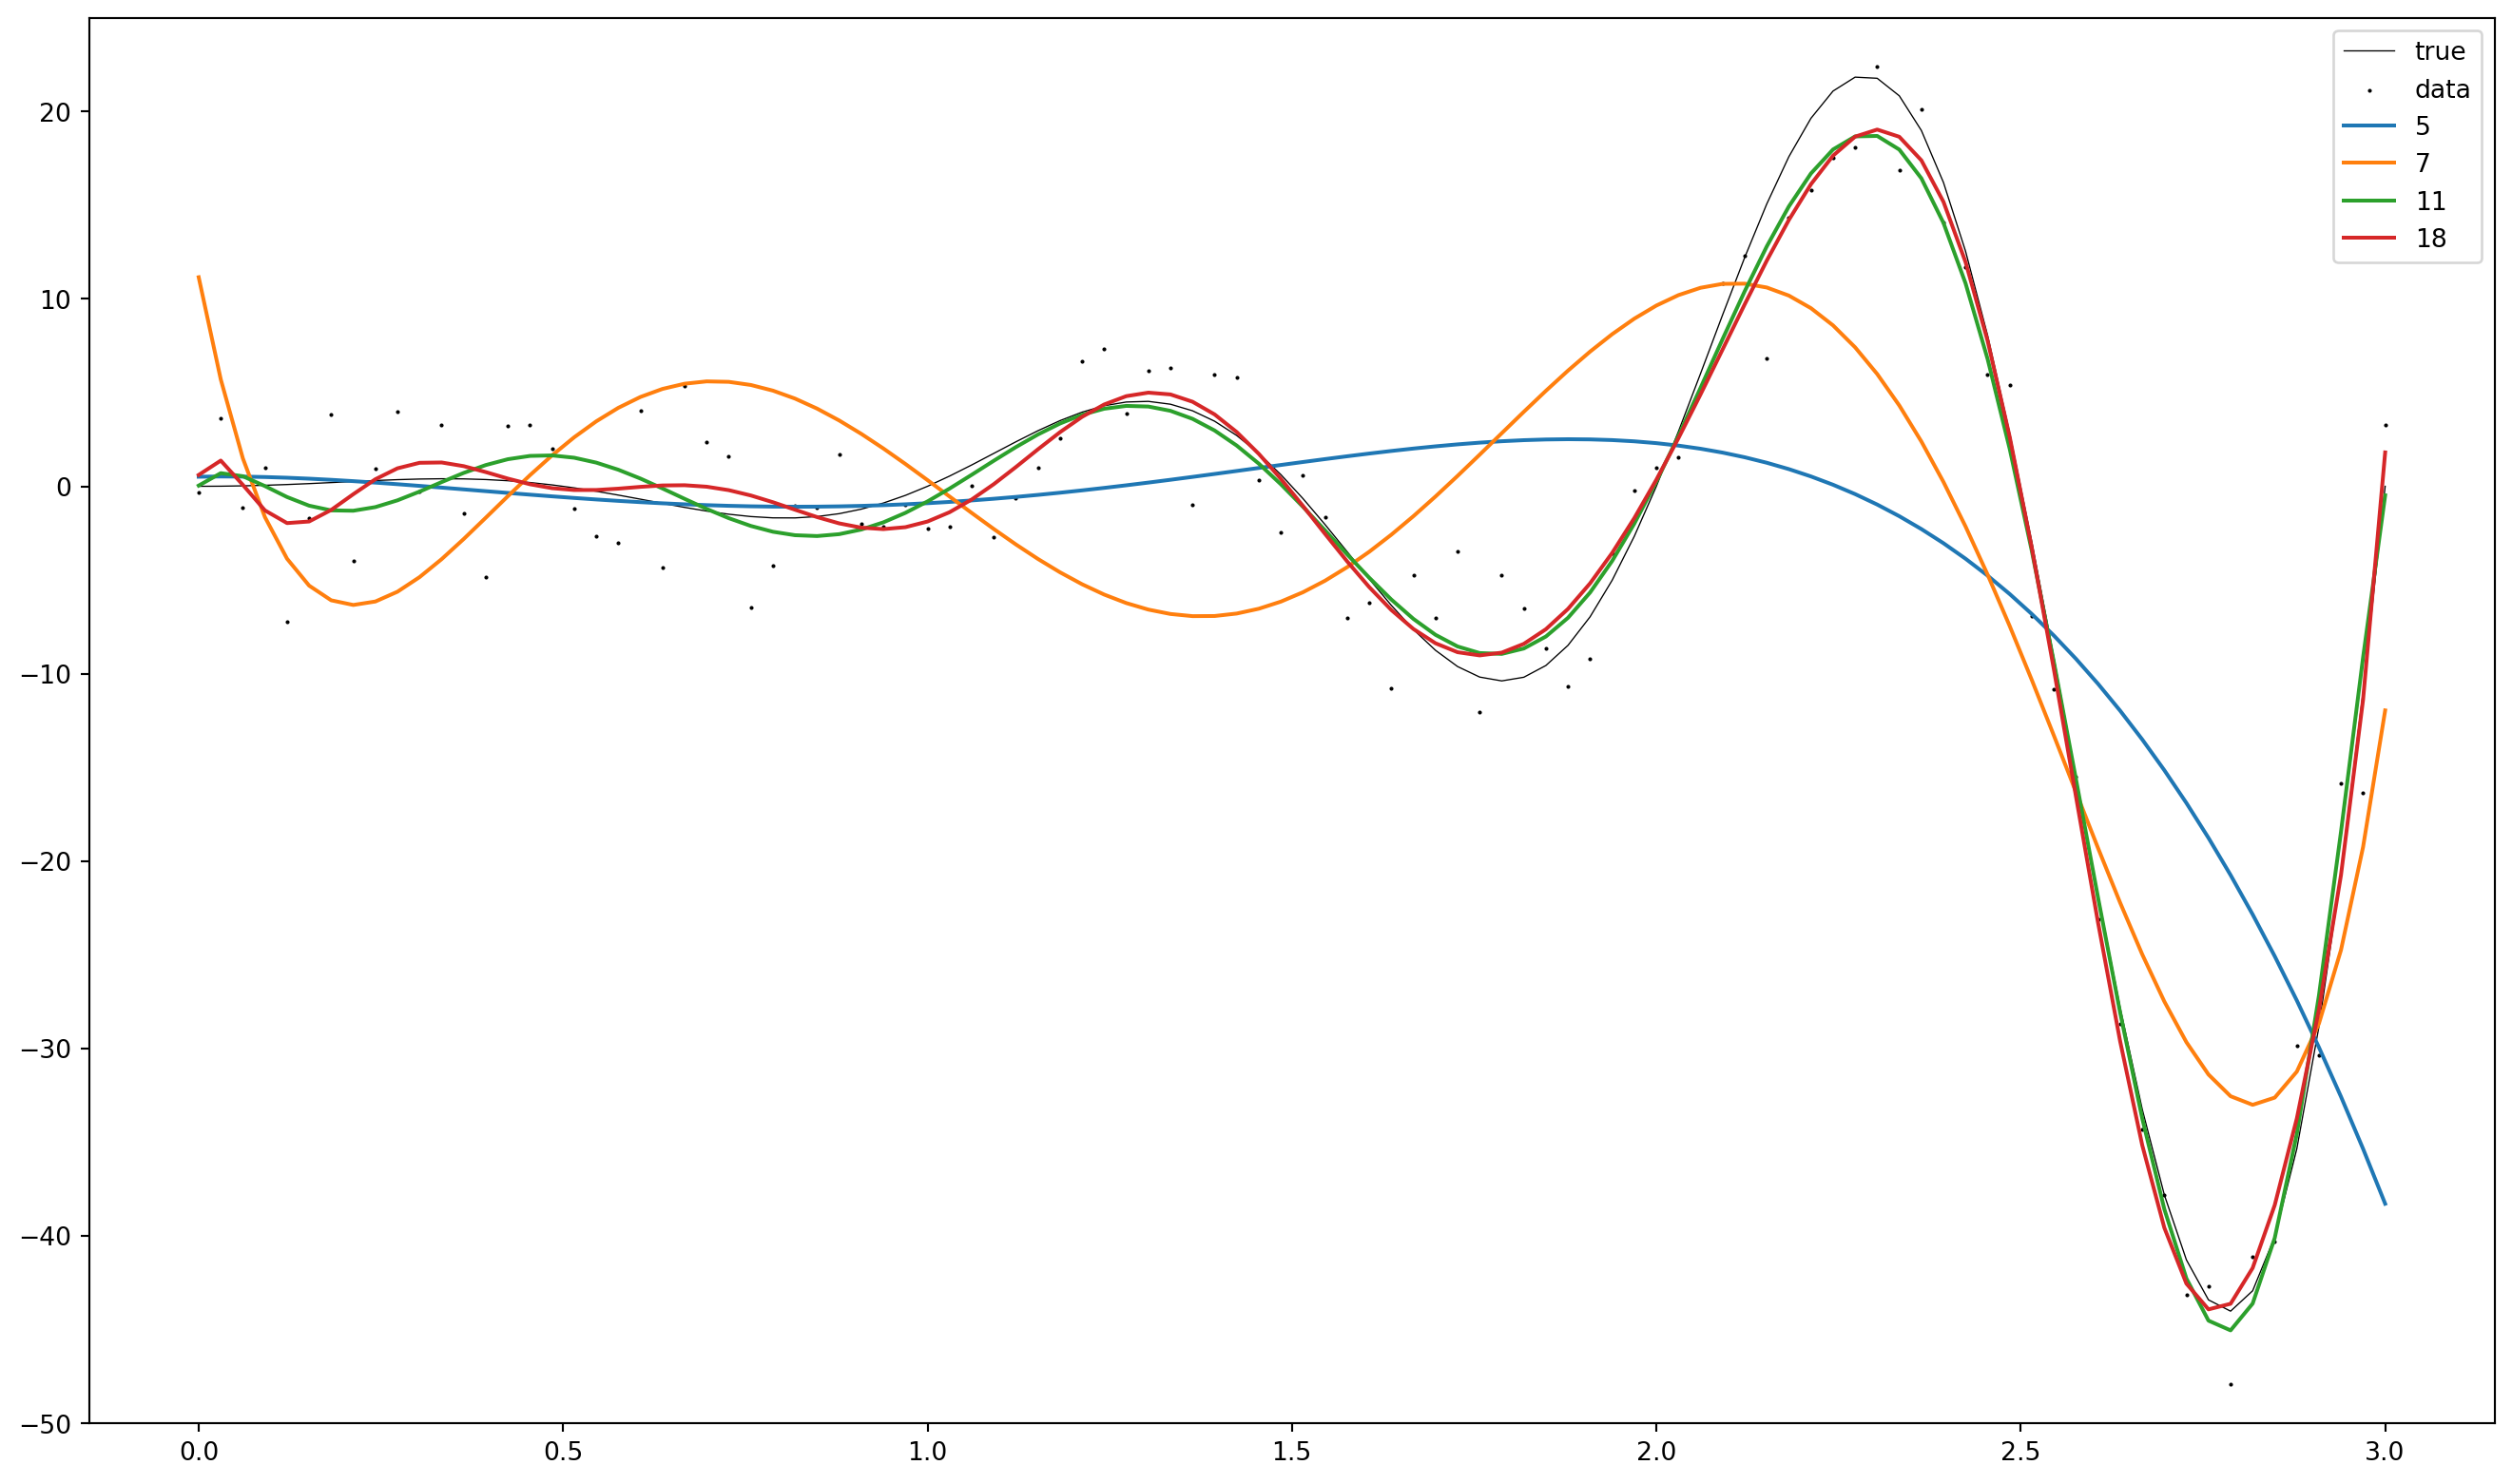

In [11]:
#| echo: false
#| fig-align: center
plt.rcParams["figure.figsize"] = (17, 10)
plt.plot(x, trues, color = "black", linewidth=0.5)
plt.scatter(x, y, s = 0.3, color = "black")
plt.ylim(-50, 25)

for deg in [5, 7, 11, 18]:
  formula = "y ~ np.vander(x, " + str(deg) + ", increasing = True)-1"
  model = smf.ols(formula, data = pd.DataFrame({"x" :x, "y":y})).fit()
  plt.plot(x, model.predict())
  
plt.legend(["true", "data", 5, 7, 11, 18])

plt.show()

In [12]:
rng = np.random.default_rng(seed = 313)
x = np.linspace(0, 3, 100)
trues = np.sin(2 * np.pi * x) * x * np.exp(x)
y = trues + rng.normal(0, 3, 100)

In [13]:
z = 1 * (trues > 0)

In [14]:
def fit_model(df):
  formula = "z ~ bs(x, degree = 3, " + "df = " + str(df) + ")"
  return smf.logit(formula, data = pd.DataFrame({"x" :x, "z":z})).fit()

In [15]:
print(fit_model(5).summary())

Optimization terminated successfully.
         Current function value: 0.458864
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      z   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.3372
Time:                        07:38:42   Log-Likelihood:                -45.886
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.551e-09
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.5252      3.288      2.289      0.022       1.08

In [16]:
def fit_model(df):
  formula = "y ~ bs(x, degree = 3, " + "df = " + str(df) + ")"
  return smf.ols(formula, data = pd.DataFrame({"x" :x, "y":y})).fit()
[(df, fit_model(df).aic) for df in range(3, 16)]

[(3, 769.919848597824),
 (4, 768.489935931196),
 (5, 770.497611464271),
 (6, 733.230555729813),
 (7, 585.9675275398621),
 (8, 573.4227183375275),
 (9, 575.0085899189091),
 (10, 543.2839496203144),
 (11, 519.8409155393351),
 (12, 517.3087684885444),
 (13, 513.5928894005049),
 (14, 515.7660420431214),
 (15, 517.8746224632054)]

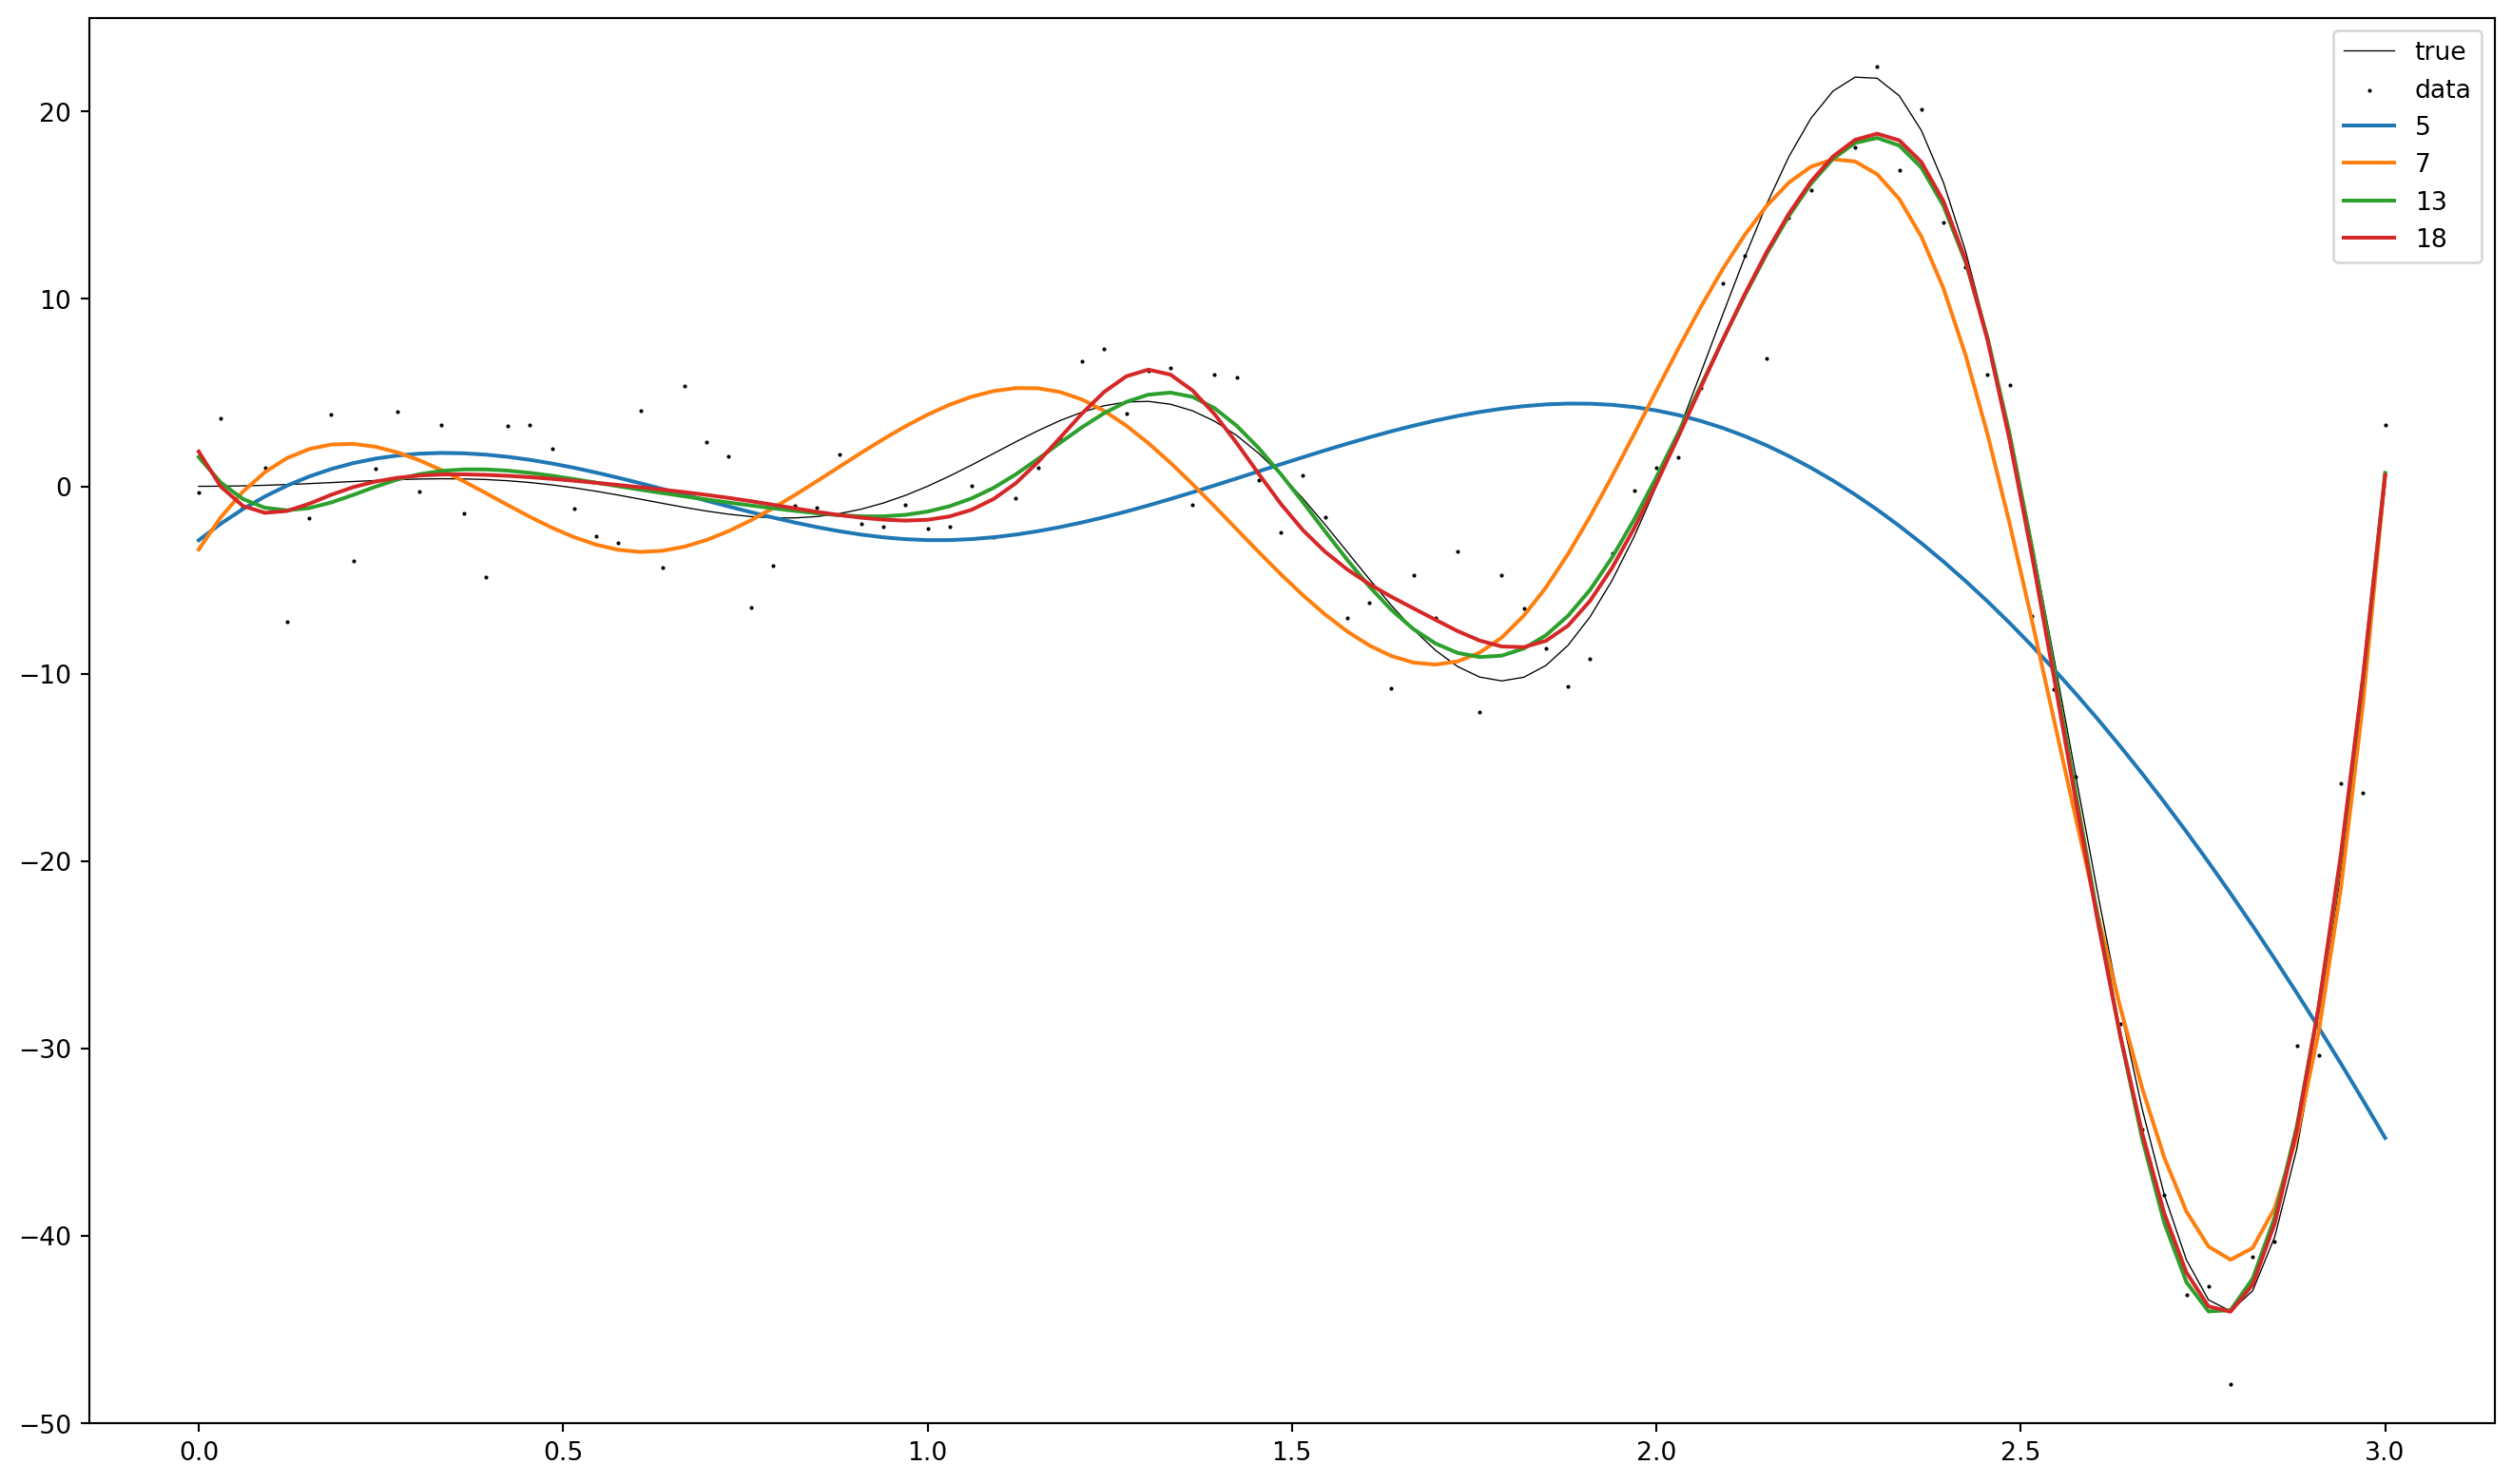

In [17]:
#| echo: false
#| fig-align: center
plt.rcParams["figure.figsize"] = (17, 10)
plt.plot(x, trues, color = "black", linewidth=0.5)
plt.scatter(x, y, s = 0.3, color = "black")
plt.ylim(-50, 25)

for deg in [5, 7, 13, 18]:
  model = fit_model(deg)
  plt.plot(x, model.predict())
  
plt.legend(["true", "data", 5, 7, 13, 18])

plt.show()

In [18]:
#| fig-align: center
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
admission = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
admission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [19]:
model = smf.logit("admit ~ gre + gpa + C(rank)", data = admission).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                 0.08292
Time:                        07:38:44   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754

In [20]:
print(model.cov_params())

              Intercept  C(rank)[T.2]  C(rank)[T.3]  C(rank)[T.4]       gre  \
Intercept      1.299488     -0.084476     -0.048644     -0.089431 -0.000301   
C(rank)[T.2]  -0.084476      0.100166      0.069566      0.070127 -0.000002   
C(rank)[T.3]  -0.048644      0.069566      0.119237      0.069742  0.000019   
C(rank)[T.4]  -0.089431      0.070127      0.069742      0.174583  0.000012   
gre           -0.000301     -0.000002      0.000019      0.000012  0.000001   
gpa           -0.303660      0.004521     -0.009469      0.003568 -0.000124   

                   gpa  
Intercept    -0.303660  
C(rank)[T.2]  0.004521  
C(rank)[T.3] -0.009469  
C(rank)[T.4]  0.003568  
gre          -0.000124  
gpa           0.110104  


In [21]:
import numpy as np
f = lambda x: np.exp(-x)/(1 + np.exp(-x)) ** 2
x = np.array([1, 0, 0, 1, 700, 3])
tau = x @ model.cov_params() @ x * f(x @ model.params) ** 2
print(tau)

0.0030549144448521514


In [22]:
F = lambda x: 1/(1+np.exp(-x))
estimate = F(x @ model.params)
CI = [estimate - np.sqrt(tau) * 1.96, estimate + np.sqrt(tau) * 1.96]
print(CI)

[0.06758919117218386, 0.2842526106166671]
